## Obesity Risk 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
os.getcwd()

'd:\\PW_DS\\Machine_Learning\\Obesity-Risk-Prediction\\research'

In [13]:
pwd

'd:\\PW_DS\\Machine_Learning\\Obesity-Risk-Prediction\\research'

In [14]:
os.chdir('..')

In [15]:
pwd

'd:\\PW_DS\\Machine_Learning\\Obesity-Risk-Prediction'

In [16]:
df = pd.read_csv('data\data.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [18]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [19]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [22]:
# df = df.drop(['id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [23]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [24]:
for col in num_cols:
    print('Unique Values: ', df[col].value_counts())

Unique Values:  id
0        1
13826    1
13844    1
13843    1
13842    1
        ..
6917     1
6916     1
6915     1
6914     1
20757    1
Name: count, Length: 20758, dtype: int64
Unique Values:  Age
18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
23.462915       1
18.065817       1
21.945380       1
16.120699       1
33.852953       1
Name: count, Length: 1703, dtype: int64
Unique Values:  Height
1.700000    1334
1.650000     782
1.600000     672
1.750000     659
1.800000     517
            ... 
1.631456       1
1.753471       1
1.782521       1
1.930416       1
1.536819       1
Name: count, Length: 1833, dtype: int64
Unique Values:  Weight
80.000000     866
75.000000     630
50.000000     618
60.000000     506
70.000000     486
             ... 
118.447942      1
77.916920       1
105.107610      1
131.572387      1
80.615325       1
Name: count, Length: 1979, dtype: int64
Unique Values:  FCVC
3.000000    7658
2.000000    

In [25]:
for col in cat_cols:
    print('Unique Values: ', df[col].value_counts())

Unique Values:  Gender
Female    10422
Male      10336
Name: count, dtype: int64
Unique Values:  family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
Unique Values:  FAVC
yes    18982
no      1776
Name: count, dtype: int64
Unique Values:  CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
Unique Values:  SMOKE
no     20513
yes      245
Name: count, dtype: int64
Unique Values:  SCC
no     20071
yes      687
Name: count, dtype: int64
Unique Values:  CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64
Unique Values:  MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64
Unique Values:  NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2

In [26]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [27]:
num_cols

['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

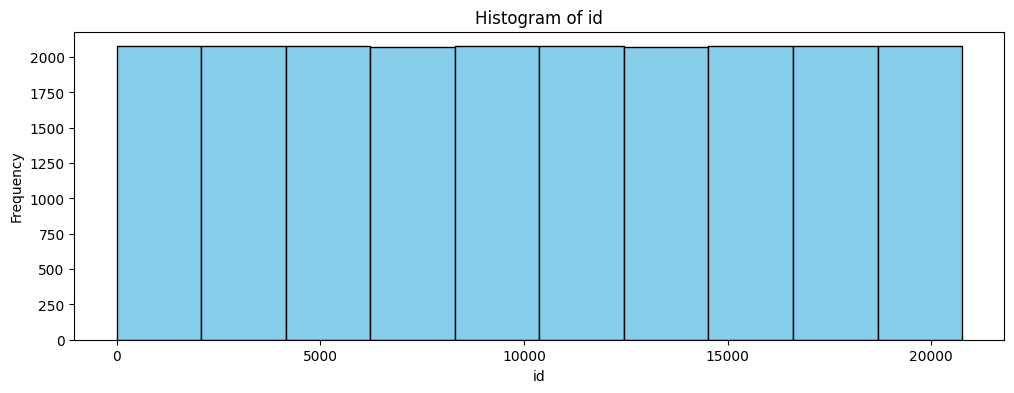

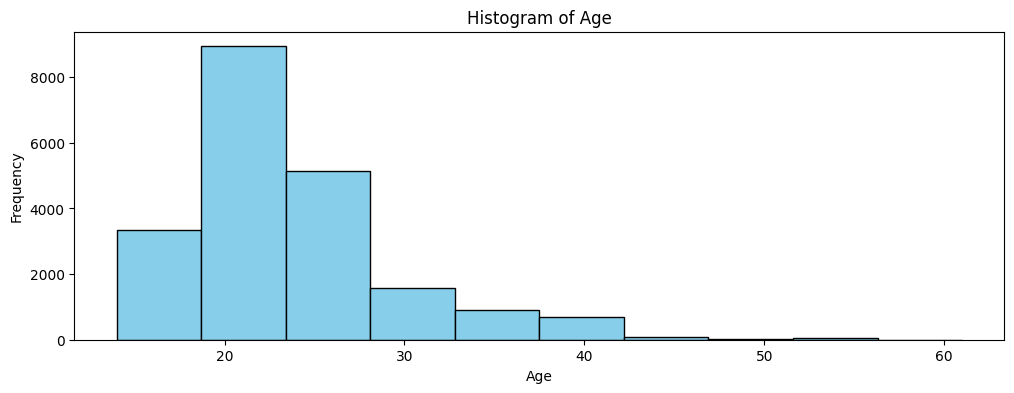

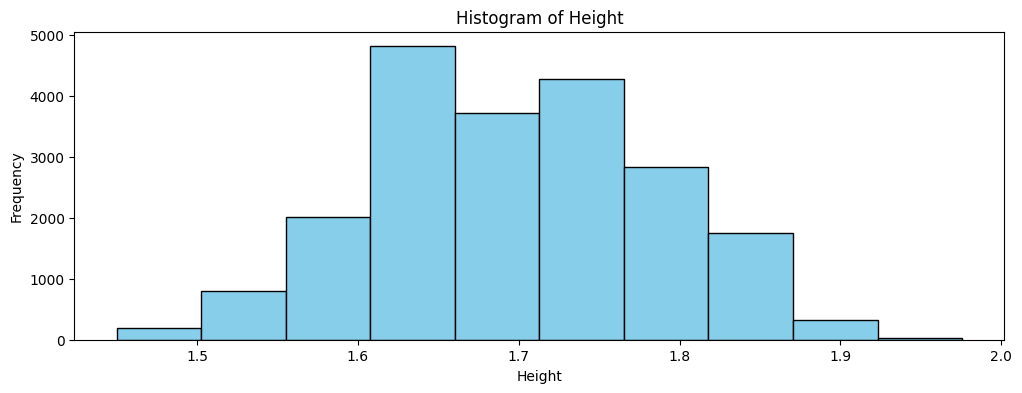

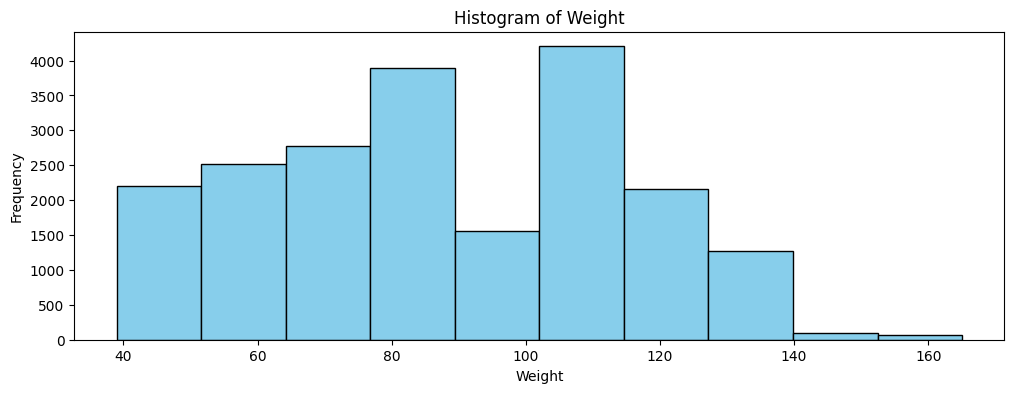

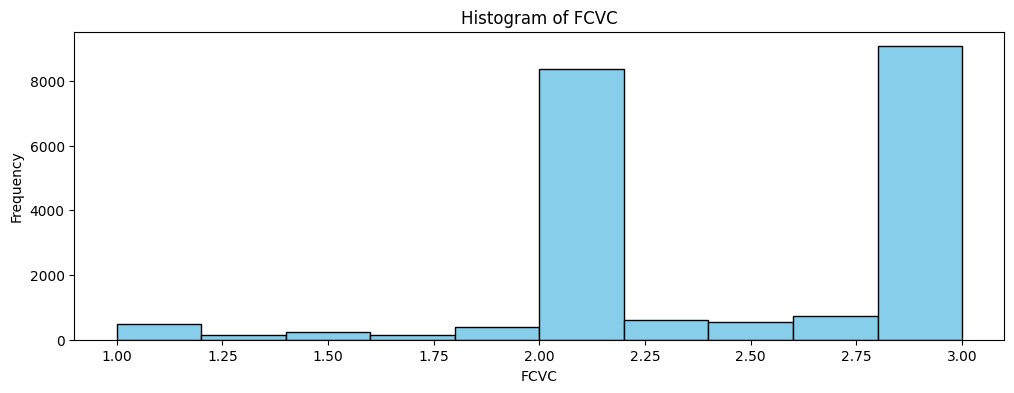

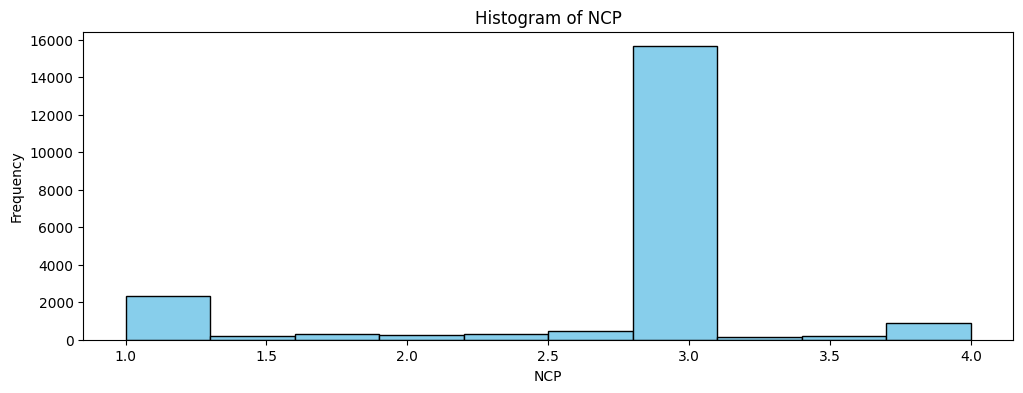

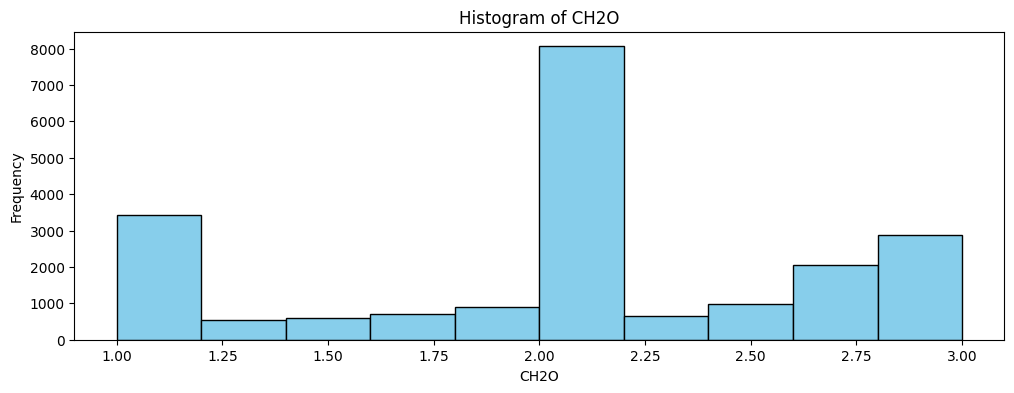

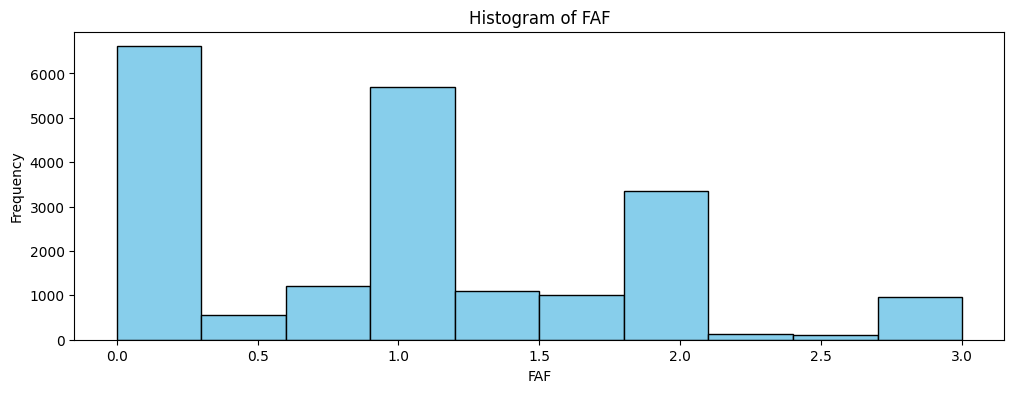

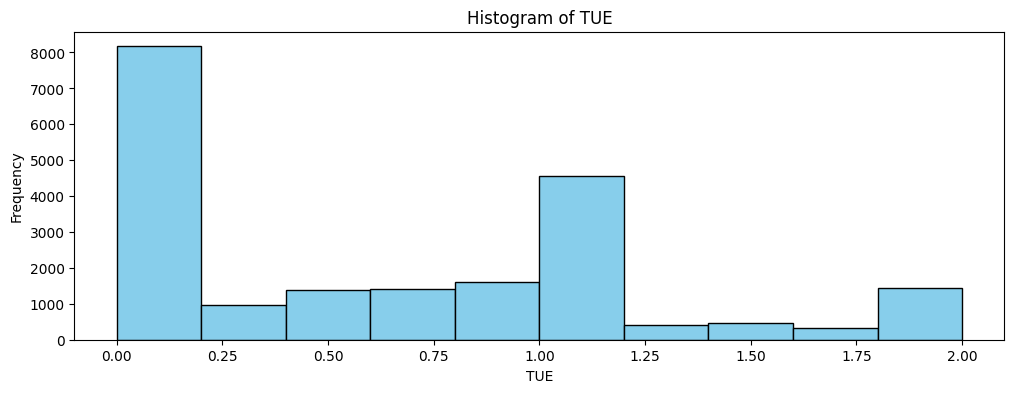

In [28]:
for column in num_cols:
    plt.figure(figsize=(12, 4))
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

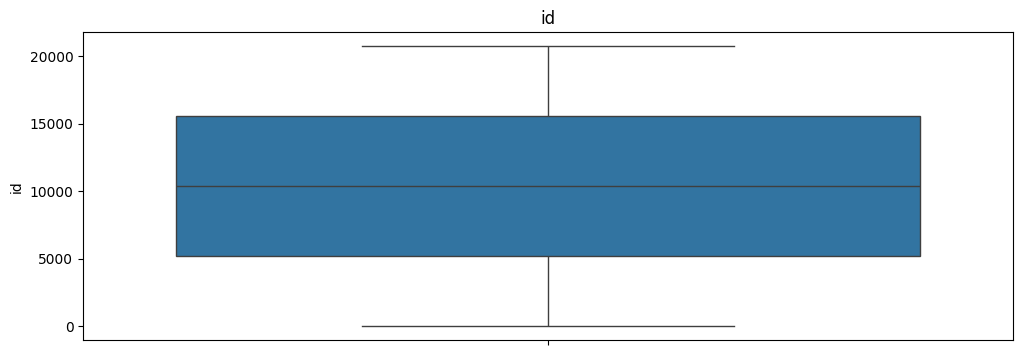

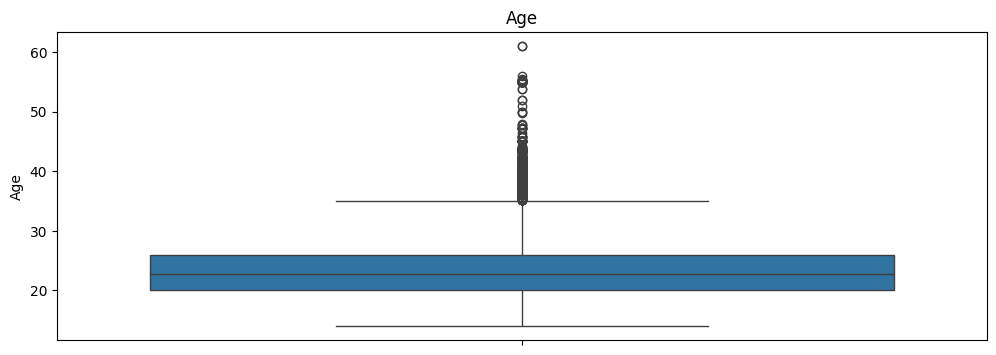

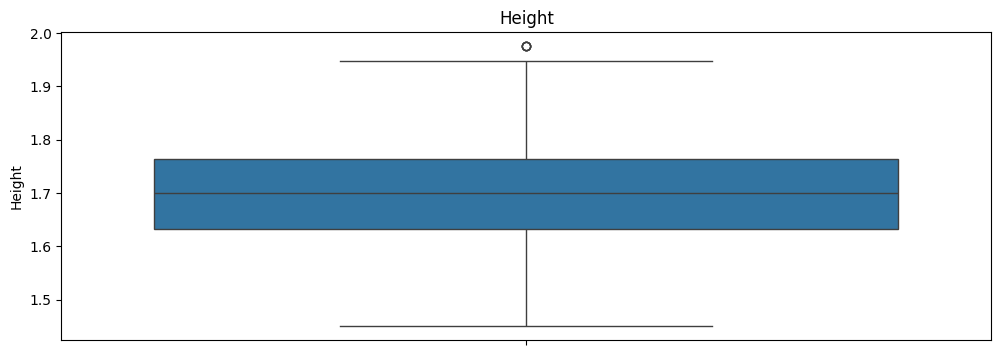

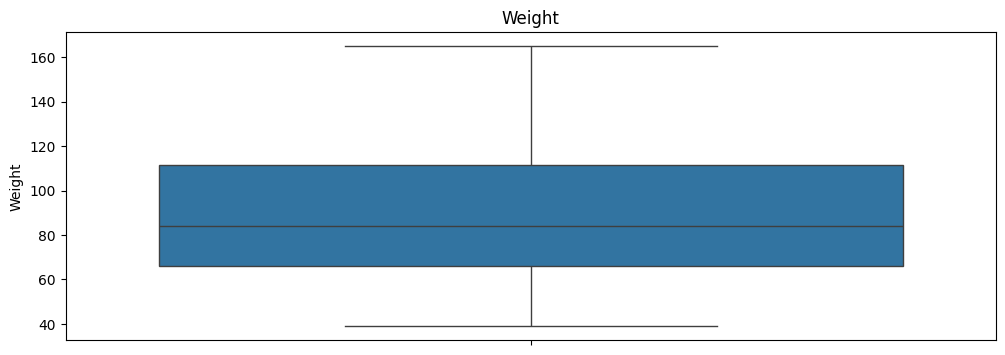

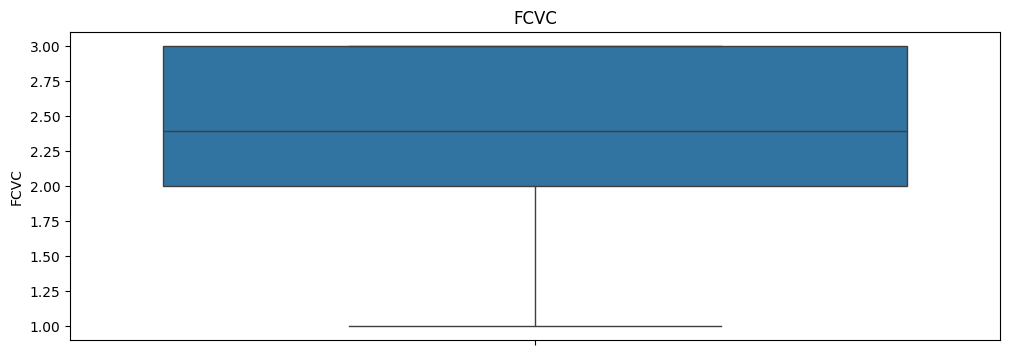

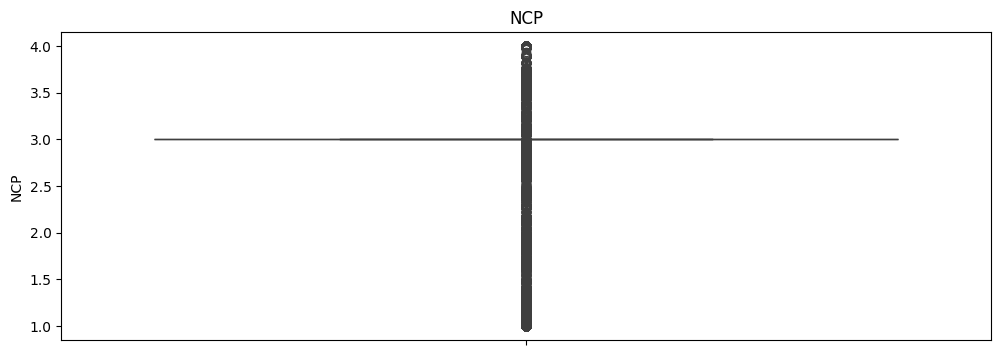

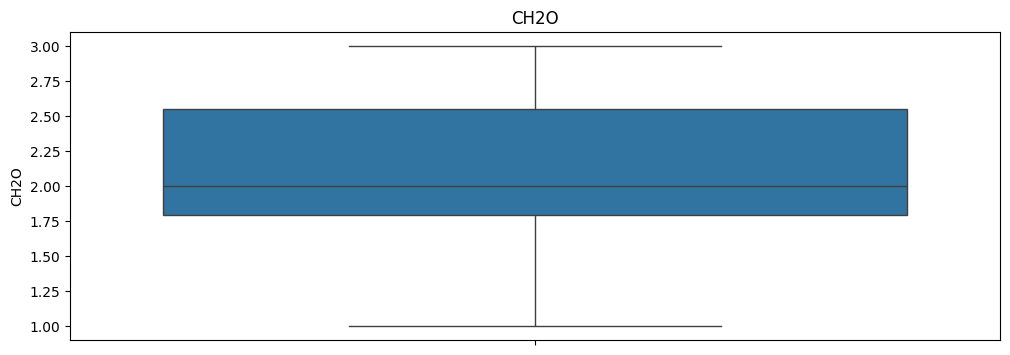

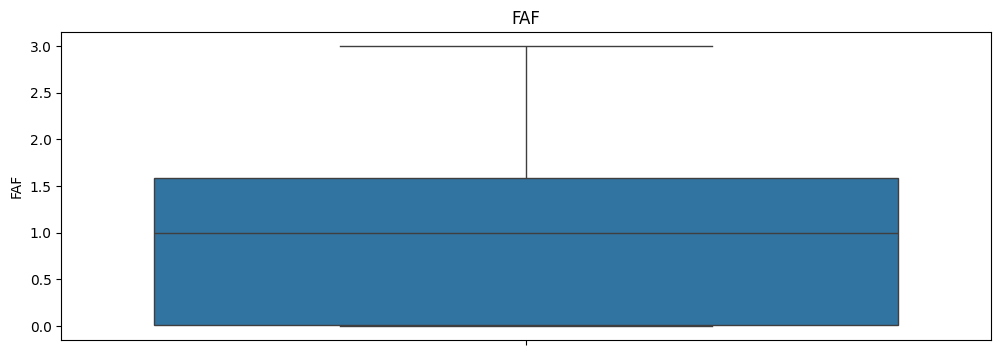

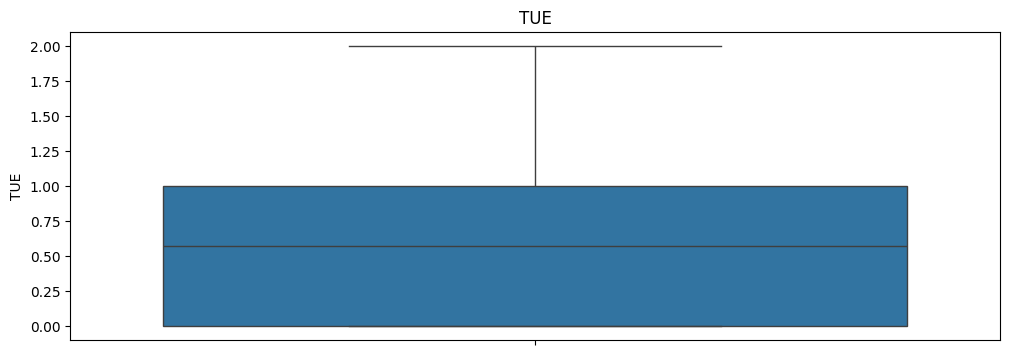

In [29]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

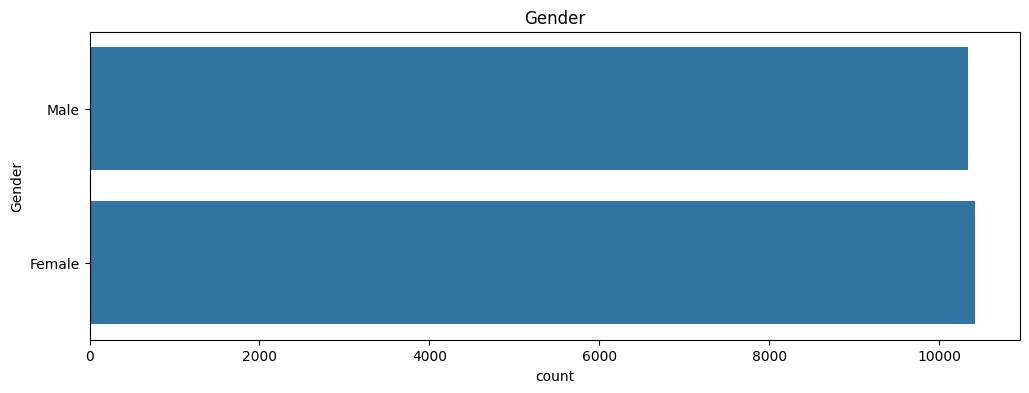

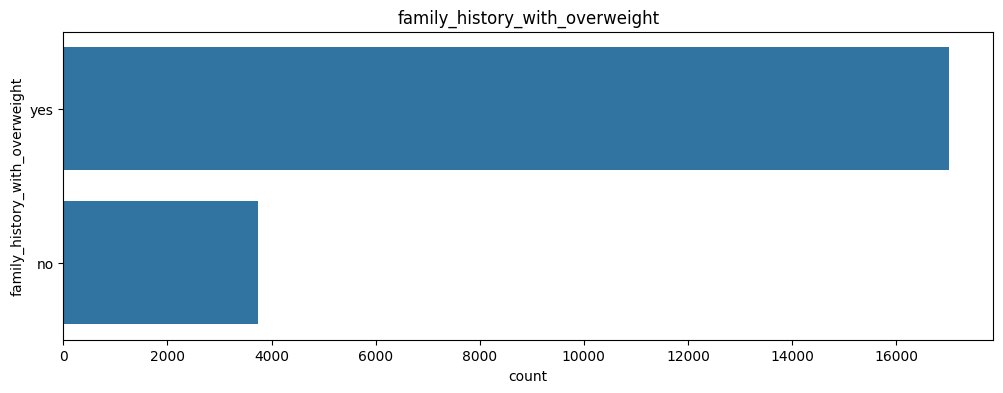

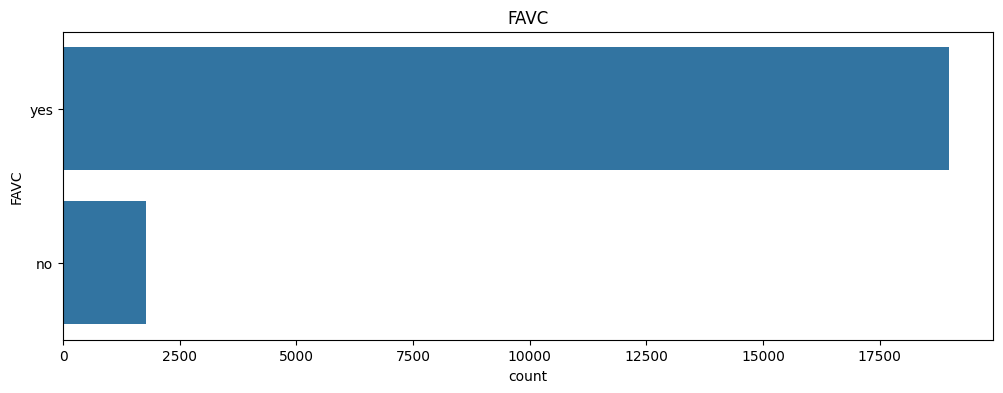

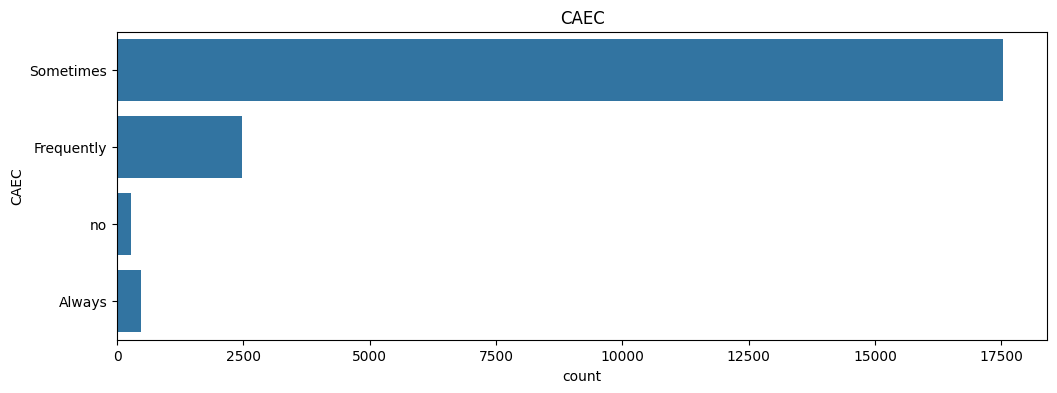

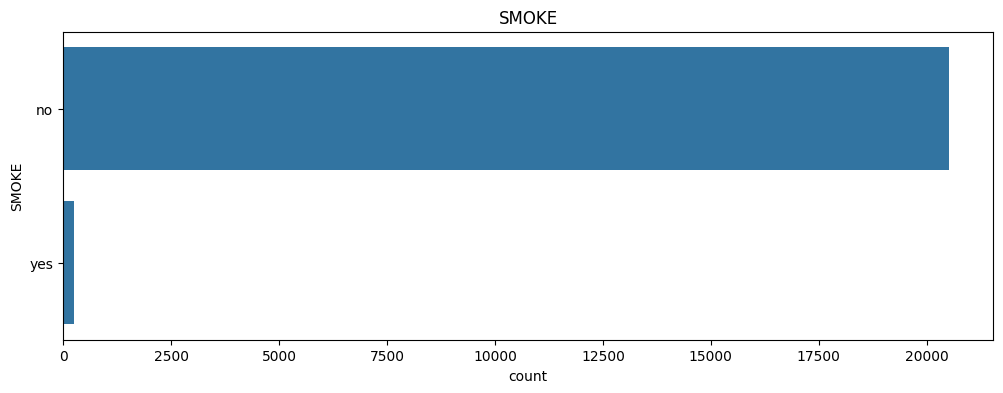

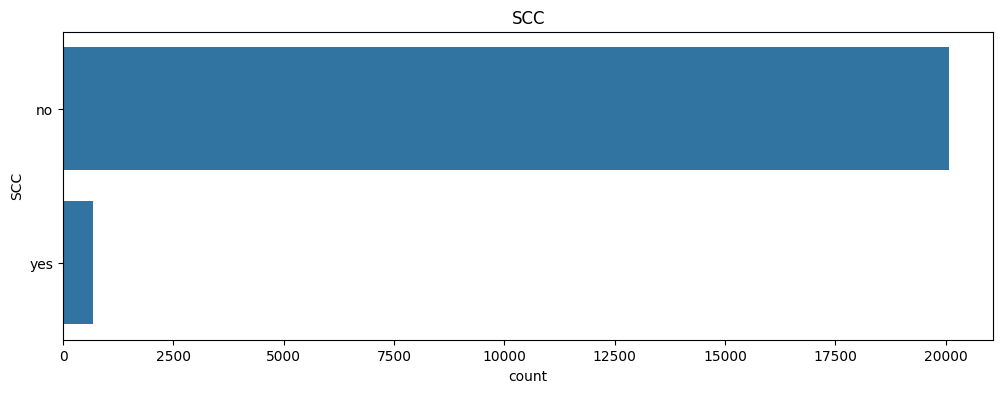

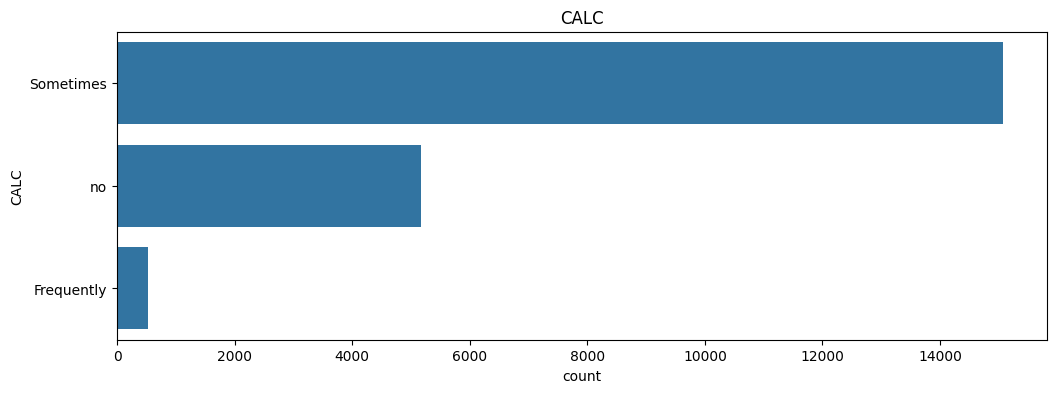

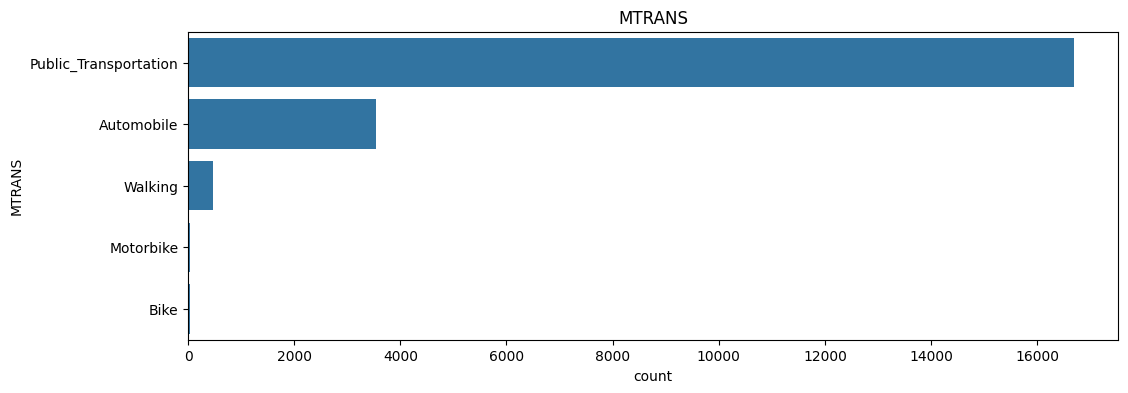

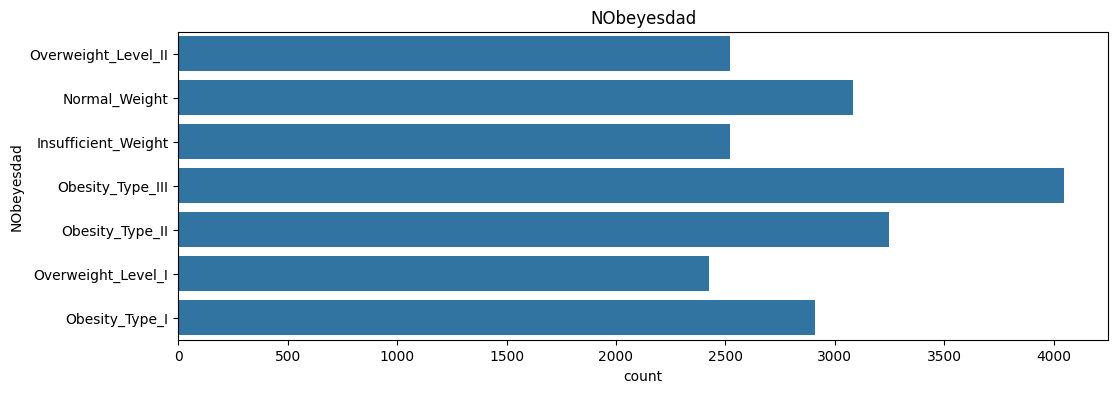

In [30]:
for col in cat_cols:
    plt.figure(figsize=(12,4))
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

In [31]:
i = 1
for col in cat_cols:
    print(f'{i}. Unique Values: ', df[col].value_counts())
    i += 1

1. Unique Values:  Gender
Female    10422
Male      10336
Name: count, dtype: int64
2. Unique Values:  family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
3. Unique Values:  FAVC
yes    18982
no      1776
Name: count, dtype: int64
4. Unique Values:  CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
5. Unique Values:  SMOKE
no     20513
yes      245
Name: count, dtype: int64
6. Unique Values:  SCC
no     20071
yes      687
Name: count, dtype: int64
7. Unique Values:  CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64
8. Unique Values:  MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64
9. Unique Values:  NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         29

In [32]:
cat_encode = [
    
    ['Male','Female'],
    ['no','yes'], ## 1
    ['no','yes'], ## 2
    ['no','Sometimes','Frequently','Always'], ## 3
    ['no','yes'], ## 4
    ['no','yes'], ## 5
    ['no','Sometimes','Frequently','Always'], ## 6
    ['Walking','Bike','Motorbike','Automobile','Public_Transportation'], ## 7
    # ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'], ## 8

]

In [34]:
cat_cols[:-1],num_cols

(['Gender',
  'family_history_with_overweight',
  'FAVC',
  'CAEC',
  'SMOKE',
  'SCC',
  'CALC',
  'MTRANS'],
 ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

In [35]:
# target = cat_cols[-1]
target = 'NObeyesdad'
target_encode = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']

In [36]:
num_cols.remove('id')

In [37]:
cat_cols.remove(target)

In [38]:
cat_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [39]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import  accuracy_score,precision_score,classification_report,confusion_matrix,recall_score,f1_score
from sklearn.impute import  SimpleImputer
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import  Pipeline

In [40]:
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder(categories=cat_encode)),
    ]
)


resample_pipeline = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols),
])


target_pipeline = Pipeline(
    steps= [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder(categories=[['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']]))
    ]
)


In [41]:
cat_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [42]:
num_cols + cat_cols

['Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [43]:
# target = cat_cols[-1]
target = 'NObeyesdad'

In [44]:
X = df.drop(['id',target],axis=1)
y = df[[target]]


In [45]:
X.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile
8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation
9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation


In [46]:
y

,NObeyesdad
0,Overweight_Level_II
1,Normal_Weight
2,Insufficient_Weight
3,Obesity_Type_III
4,Overweight_Level_II
...,...
20753,Obesity_Type_II
20754,Insufficient_Weight
20755,Obesity_Type_II
20756,Overweight_Level_II


In [47]:
len(X.columns),len(num_cols+cat_cols)

(16, 16)

In [50]:
X_trans = pd.DataFrame(resample_pipeline.fit_transform(X),columns=num_cols+cat_cols)
y_trans = pd.DataFrame(target_pipeline.fit_transform(y))

In [52]:
y_trans.columns = [target]
y_trans.head()

,NObeyesdad
0,3.0
1,1.0
2,0.0
3,6.0
4,3.0


In [53]:
dataset_final = pd.concat([X_trans,y_trans],axis=1)
dataset_final.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,3.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,6.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,3.0


In [54]:
num_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [55]:
X_trans['family_history_with_overweight'].value_counts()

family_history_with_overweight
1.0    17014
0.0     3744
Name: count, dtype: int64

In [56]:
X_trans['Gender'].value_counts(),df['Gender'].value_counts()

(Gender
 1.0    10422
 0.0    10336
 Name: count, dtype: int64,
 Gender
 Female    10422
 Male      10336
 Name: count, dtype: int64)

In [57]:
dataset_final = pd.concat([X_trans,y_trans],axis=1)
dataset_final.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,3.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,6.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,3.0


In [59]:
dataset_final.shape

(20758, 17)

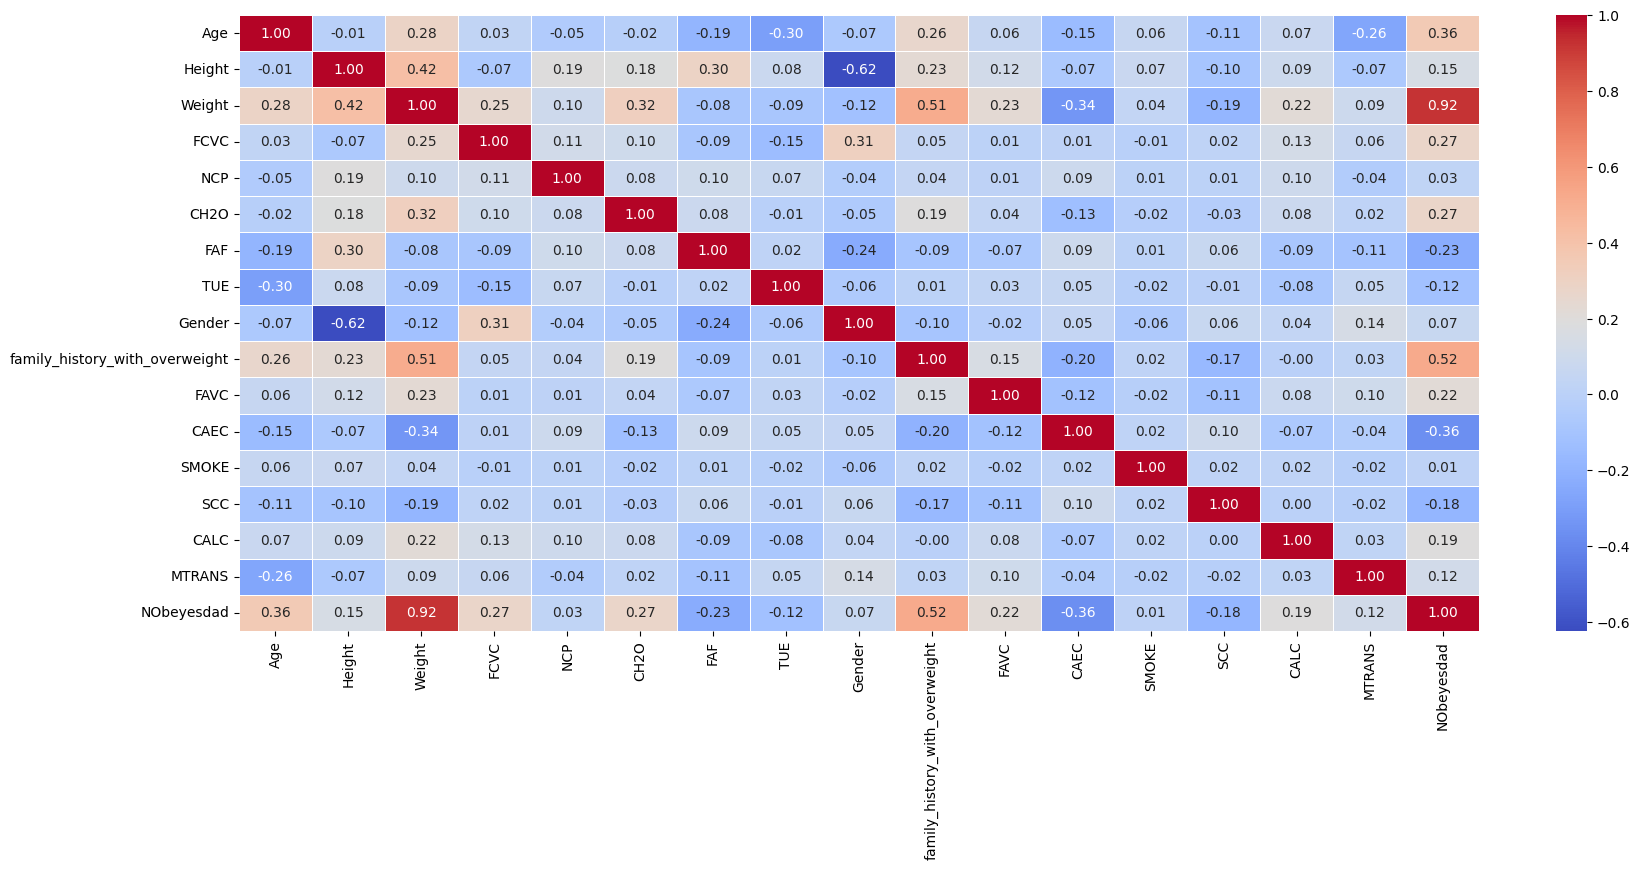

In [60]:
correlation_matrix = dataset_final.corr()

# Set up the figure size
plt.figure(figsize=(20,8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

In [61]:
X_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20758 non-null  float64
 1   Height                          20758 non-null  float64
 2   Weight                          20758 non-null  float64
 3   FCVC                            20758 non-null  float64
 4   NCP                             20758 non-null  float64
 5   CH2O                            20758 non-null  float64
 6   FAF                             20758 non-null  float64
 7   TUE                             20758 non-null  float64
 8   Gender                          20758 non-null  float64
 9   family_history_with_overweight  20758 non-null  float64
 10  FAVC                            20758 non-null  float64
 11  CAEC                            20758 non-null  float64
 12  SMOKE                           

In [62]:
X_trans.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0


In [63]:
y_trans.columns = [target]
y_trans.head()

,NObeyesdad
0,3.0
1,1.0
2,0.0
3,6.0
4,3.0


In [64]:
X_trans.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0


In [66]:
from imblearn.over_sampling import  SMOTE
resample = SMOTE()
resample

SMOTE()

In [67]:
X_resample, y_resample = resample.fit_resample(X_trans,y_trans)

In [68]:
y_resample.value_counts()

NObeyesdad
0.0           4046
1.0           4046
2.0           4046
3.0           4046
4.0           4046
5.0           4046
6.0           4046
Name: count, dtype: int64

In [69]:
X_resample.shape,y_resample.shape

((28322, 16), (28322, 1))

In [70]:
data_clean_balanced = pd.concat([X_resample, y_resample], axis=1)
data_clean_balanced.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,3.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,6.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,3.0


In [71]:
data_clean_balanced.shape

(28322, 17)

In [72]:
data_clean_balanced['NObeyesdad'].value_counts()

NObeyesdad
3.0    4046
1.0    4046
0.0    4046
6.0    4046
5.0    4046
2.0    4046
4.0    4046
Name: count, dtype: int64

In [73]:
data_clean_balanced.to_csv('data\data_clean_balanced.csv',index=False)

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.10,random_state=42)

In [79]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
20952,-0.876170,0.401325,-1.401313,-1.324374,0.338364,-0.117229,-1.135225,-0.425012,1.0,0.000000,1.0,1.000000,0.0,0.0,1.0,4.000000
10575,0.099685,-0.575479,0.051703,-1.111381,0.338364,-0.048349,-0.780559,0.636513,0.0,1.000000,1.0,1.000000,0.0,0.0,0.0,3.000000
22997,-0.412271,-0.343511,-0.885053,1.039171,0.338364,-0.048349,0.021775,-1.024344,1.0,1.000000,1.0,1.000000,0.0,0.0,0.0,4.000000
12050,-0.171730,1.435636,1.245714,0.598559,0.338364,1.595165,-0.437547,-0.580769,0.0,1.000000,1.0,1.000000,0.0,0.0,1.0,4.000000
19220,1.222668,-1.078675,0.461677,-0.831058,-2.497077,-1.092051,0.317028,-0.266226,0.0,1.000000,1.0,1.000000,0.0,0.0,1.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-1.027052,1.664494,-0.609042,1.039171,1.756085,-0.048349,1.214691,0.636513,0.0,1.000000,1.0,1.454691,0.0,0.0,0.0,3.454691
5390,-0.499620,-0.919083,-0.753930,-0.836279,0.338364,1.595165,1.214691,-1.024344,0.0,0.000000,1.0,3.000000,0.0,0.0,1.0,4.000000
860,0.379434,-0.574047,0.911789,1.039171,0.338364,1.218360,-1.171141,-0.630211,1.0,1.000000,1.0,1.000000,0.0,0.0,1.0,4.000000
15795,2.488796,0.848531,0.762394,0.972441,0.200513,1.176466,1.865674,-1.024344,0.0,1.000000,1.0,1.000000,0.0,0.0,1.0,3.000000


In [80]:
y_train

,NObeyesdad
20952,0.0
10575,4.0
22997,1.0
12050,5.0
19220,5.0
...,...
21575,0.0
5390,2.0
860,6.0
15795,4.0


In [81]:
y_test

,NObeyesdad
17757,3.0
23215,1.0
1122,4.0
9406,2.0
10333,3.0
...,...
1603,3.0
15851,6.0
23612,2.0
2214,6.0


In [82]:
clf = RandomForestClassifier()


In [83]:
clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)


C:\Users\Maaz\AppData\Local\Temp\ipykernel_9396\3247026591.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier()

In [84]:
y_pred = clf.predict(X_test)

In [85]:
print(confusion_matrix(y_test,y_pred))

[[391  17   2   1   0   0   0]
 [ 16 376  19   3   0   0   0]
 [  3  27 380  19   4   0   0]
 [  0   8  25 352  14   3   0]
 [  1   2  10  19 364   8   0]
 [  0   0   0   2   8 369   0]
 [  0   0   0   0   1   1 388]]


In [86]:

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')

In [87]:
print(accuracy, precision, recall)

0.9248146840804801 0.9251299861193426 0.9248146840804801


In [88]:
print(f1_score(y_test,y_pred,average='weighted'))

0.9248801199025709


In [89]:
df_test = pd.read_csv('test_new.csv')
df_test.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0.508163,1.682789,1.273786,0.932524,0.350808,1.298389,-0.141769,-1.005016,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
1,-0.509128,-1.114658,-0.818988,-0.833161,-2.462523,1.583678,0.030307,-1.005016,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
2,0.353000,-0.626191,0.927432,1.047997,0.350808,0.965029,-1.159701,-0.592995,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
3,-0.512705,-1.642760,0.623672,-0.833161,0.319733,1.234234,-1.046828,-1.005016,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
4,0.353000,-0.805996,0.668336,1.047997,0.350808,1.016818,-1.159701,0.213881,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0


In [125]:
test_pred = clf.predict(df_test)

In [126]:
test_pred

array([5., 2., 6., ..., 0., 1., 5.])

In [129]:
test_pred = pd.DataFrame(test_pred,columns=['NObeyesdad'])

In [130]:
test_pred

,NObeyesdad
0,5.0
1,2.0
2,6.0
3,4.0
4,6.0
...,...
13835,3.0
13836,2.0
13837,0.0
13838,1.0


In [131]:
target_map = {0.0: 'Insufficient_Weight',1.0: 'Normal_Weight',2.0: 'Overweight_Level_I',3.0: 'Overweight_Level_II',4.0: 'Obesity_Type_I',5.0: 'Obesity_Type_II',6.0: 'Obesity_Type_III'}

In [132]:
test_pred['NObeyesdad'] = test_pred['NObeyesdad'].map(target_map)

In [133]:
test_pred

,NObeyesdad
0,Obesity_Type_II
1,Overweight_Level_I
2,Obesity_Type_III
3,Obesity_Type_I
4,Obesity_Type_III
...,...
13835,Overweight_Level_II
13836,Overweight_Level_I
13837,Insufficient_Weight
13838,Normal_Weight


In [120]:
id_ = [i for i in range(20758,34598)]

In [124]:
id_

[20758,
 20759,
 20760,
 20761,
 20762,
 20763,
 20764,
 20765,
 20766,
 20767,
 20768,
 20769,
 20770,
 20771,
 20772,
 20773,
 20774,
 20775,
 20776,
 20777,
 20778,
 20779,
 20780,
 20781,
 20782,
 20783,
 20784,
 20785,
 20786,
 20787,
 20788,
 20789,
 20790,
 20791,
 20792,
 20793,
 20794,
 20795,
 20796,
 20797,
 20798,
 20799,
 20800,
 20801,
 20802,
 20803,
 20804,
 20805,
 20806,
 20807,
 20808,
 20809,
 20810,
 20811,
 20812,
 20813,
 20814,
 20815,
 20816,
 20817,
 20818,
 20819,
 20820,
 20821,
 20822,
 20823,
 20824,
 20825,
 20826,
 20827,
 20828,
 20829,
 20830,
 20831,
 20832,
 20833,
 20834,
 20835,
 20836,
 20837,
 20838,
 20839,
 20840,
 20841,
 20842,
 20843,
 20844,
 20845,
 20846,
 20847,
 20848,
 20849,
 20850,
 20851,
 20852,
 20853,
 20854,
 20855,
 20856,
 20857,
 20858,
 20859,
 20860,
 20861,
 20862,
 20863,
 20864,
 20865,
 20866,
 20867,
 20868,
 20869,
 20870,
 20871,
 20872,
 20873,
 20874,
 20875,
 20876,
 20877,
 20878,
 20879,
 20880,
 20881,
 20882,


In [121]:
out = {
    'id': id_,
    'NObeyesdad': test_pred['NObeyesdad']
}

In [122]:
out = pd.DataFrame(out)

In [134]:
out.to_csv('ob_results.csv',index=False)